In [31]:
import ROOT
import sys

In [32]:
from limitFunction import printLimits as PL

In [33]:
fin = ROOT.TFile("WorkspaceFile.root")
ws = fin.Get("ws")
ws.Print()



RooWorkspace(ws) ws contents

variables
---------
(background,lam,mass,signal)

p.d.f.s
-------
RooExponential::expo[ x=mass c=lam ] = 0.986073
RooHistPdf::sighisto[ pdfObs=(mass) ] = 0
RooAddPdf::sumPDF[ signal * sighisto + background * expo ] = 0.786755

datasets
--------
RooDataSet::extPDFData(mass)

embedded datasets (in pdfs and functions)
-----------------------------------------
RooDataHist::dh(mass)



In [38]:
poi = ROOT.RooArgSet(ws.var("signal"))#setting the parameter of interest
observables=ROOT.RooArgSet((ws.var("mass")))#we need to define the observable for the fit

vm=ws.var("mass")
frm=vm.frame()

sigvalue=5
bkgvalue=100
paramsscan_all ={"npoints":40,"poimin":1,"poimax":40,"minplot":0.001,"maxplot":10}

#SmallSigData=ws.pdf("sighisto").generate(ws.var("mass"),10)
#SmallSigAllData=ws.pdf("expo").generate(ws.var("mass"),100)
ws.var("lam").setConstant(True)
ws.var("signal").setVal(sigvalue)
ws.var("background").setVal(bkgvalue)
print(ws.var("lam"))
ws.var("signal").setConstant(True)
ws.var("background").setConstant(True)

SmallSigAllData=ws.pdf("sumPDF").generate(ws.var("mass"))

#SmallSigAllData.append(SmallSigData)

RooRealVar::lam = -0.0102996 +/- 0.000448885 C  L(-5 - 0) 



[#0] WARNING:Plotting -- Cannot apply a bin width correction and use Poisson errors. Not correcting for bin width.


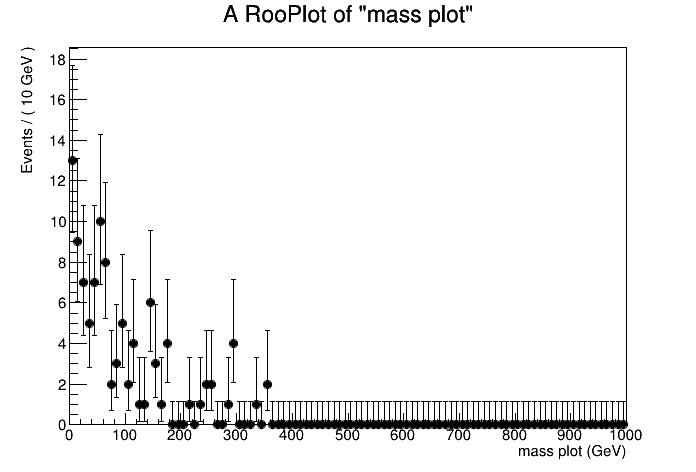

In [39]:
c1=ROOT.TCanvas()
c1.Draw()
SmallSigAllData.plotOn(frm)
frm.Draw()

In [40]:
SBModelSmallSig=ROOT.RooStats.ModelConfig()
SBModelSmallSig.SetWorkspace(ws)
SBModelSmallSig.SetPdf(ws.pdf("sumPDF"))
SBModelSmallSig.SetObservables(observables)
SBModelSmallSig.SetParametersOfInterest(poi)

BModelSmallSig=SBModelSmallSig.Clone("BModelSmallSig")
BModelSmallSig.SetParametersOfInterest(poi)
poi.find("signal").setVal(0.0)
BModelSmallSig.SetSnapshot(poi) 
BModelSmallSig.SetObservables(observables)
BModelSmallSig.Print()

profll = ROOT.RooStats.ProfileLikelihoodTestStat(SBModelSmallSig.GetPdf())
profll.SetOneSided(1)

[#1] INFO:ObjectHandling -- RooWorkspace::saveSnaphot(ws) replacing previous snapshot with name BModelSmallSig__snapshot

=== Using the following for BModelSmallSig ===
Observables:             RooArgSet:: = (mass)
Parameters of Interest:  RooArgSet:: = (signal)
PDF:                     RooAddPdf::sumPDF[ signal * sighisto + background * expo ] = 0.00978294/1
Snapshot:                
  1) 0x55a7677c7cf0 RooRealVar:: signal = 0 +/- 24.3435 C  L(0 - 2000)  "signal events"



In [41]:
doHypothesisTest=True
doAsymp=True
if(doHypothesisTest):
    poi.find("signal").setVal(sigvalue)
    SBModelSmallSig.SetSnapshot(poi)
PL(DATA=SmallSigAllData,BM=BModelSmallSig,SM=SBModelSmallSig,poiname="signal",signif=doHypothesisTest,asymp=doAsymp,paramsscan=paramsscan_all,postfix="all")


====
 upper limit is  12.658385207802878  exp  12.493445422818548  p1  12.493445422818548  m1  7.059370857020844 

 ====
[#1] INFO:ObjectHandling -- RooWorkspace::saveSnaphot(ws) replacing previous snapshot with name snapshot

=== Using the following for BModelSmallSig ===
Observables:             RooArgSet:: = (mass)
Parameters of Interest:  RooArgSet:: = (signal)
PDF:                     RooAddPdf::sumPDF[ signal * sighisto + background * expo ] = 0.00931709/1
Snapshot:                
  1) 0x55a7676ebf20 RooRealVar:: signal = 0 +/- 24.3435 C  L(0 - 2000)  "signal events"


=== Using the following for  ===
Observables:             RooArgSet:: = (mass)
Parameters of Interest:  RooArgSet:: = (signal)
PDF:                     RooAddPdf::sumPDF[ signal * sighisto + background * expo ] = 0.00931709/1
Snapshot:                
  1) 0x55a766bc22b0 RooRealVar:: signal = 5 +/- 24.3435 C  L(0 - 2000)  "signal events"

[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize....
[#0] PROGRESS:Eva

Info in <TCanvas::Print>: png file limitexall.png has been created
